# Importación de Módulos

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display


# Importar los datos

In [15]:
# Importar los datos

# Guarda los nombres únicos de las primeras dos columnas.
index_col_names=['unit_id','time_cycle']
# Genera los nombres del primer set de columnas con formato, estas son las de operational setting n.
operat_set_col_names=['oper_set{}'.format(i) for i in range(1,4)]
# Genera los nombres del segundo set de columnas con formato, estas son las de sensor measurement n.
sensor_measure_col_names=['sm_{}'.format(i) for i in range(1,22)]
# Pone todos los títulos en una lista
all_col=index_col_names+operat_set_col_names+sensor_measure_col_names

# Importa los datos desde el .txt com su nombre de columna en un dataframe.
train_df=pd.read_csv('train.txt',delim_whitespace=True,names=all_col)
train_df

C:\Users\dave4\AppData\Local\Temp\ipykernel_19968\1475424004.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df=pd.read_csv('train.txt',delim_whitespace=True,names=all_col)


,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761


# Calcular RUL

In [16]:
# Primero se encuentra el ciclo de tiempo máximo para cada motor.

max_time_cycle=train_df.groupby('unit_id')['time_cycle'].max()

rul = pd.DataFrame(max_time_cycle).reset_index()
rul.columns = ['unit_id', 'max']
rul

,unit_id,max
0,1,223
1,2,164
2,3,150
3,4,159
4,5,357
...,...,...
213,214,150
214,215,156
215,216,190
216,217,287


In [17]:
# Se calcula el RUL para cada fila con un id específico y se le resta al máximo.

train_df = train_df.merge(rul, on=['unit_id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['time_cycle']
train_df.drop('max', axis=1, inplace=True)
train_df[train_df.unit_id==1].iloc[:,[1,-1]]

,time_cycle,RUL
0,1,222
1,2,221
2,3,220
3,4,219
4,5,218
...,...,...
218,219,4
219,220,3
220,221,2
221,222,1


In [18]:
display(train_df.describe())

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,...,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,24.008881,0.571251,49.172438,472.861677,579.596770,1419.947816,1205.669194,8.029878,...,2334.185381,8065.548831,9.332433,0.023354,348.293915,2228.342654,97.741699,20.776822,12.466282,109.307396
std,62.866193,68.420545,14.793676,0.310935,32.503659,26.460179,37.391068,106.286960,119.550936,3.627125,...,128.426495,84.964099,0.751834,0.004722,27.837602,145.693883,5.378969,9.903697,5.941954,68.420545
min,1.000000,1.000000,0.000000,0.000000,0.000000,445.000000,535.650000,1245.430000,1029.490000,3.910000,...,2027.720000,7851.590000,8.325300,0.020000,303.000000,1915.000000,84.930000,10.230000,6.126600,0.000000
25%,54.000000,53.000000,10.004500,0.250600,20.000000,445.000000,549.580000,1352.910000,1124.010000,3.910000,...,2387.880000,8061.230000,8.676925,0.020000,331.000000,2212.000000,100.000000,10.840000,6.504600,52.000000
50%,110.000000,106.000000,25.001500,0.700000,40.000000,462.540000,555.985000,1369.140000,1138.870000,7.050000,...,2388.070000,8081.475000,9.314500,0.020000,335.000000,2223.000000,100.000000,14.870000,8.925200,105.000000
75%,164.000000,160.000000,41.998100,0.840000,80.000000,491.190000,607.370000,1499.697500,1307.437500,10.520000,...,2388.160000,8126.380000,9.390000,0.030000,369.000000,2324.000000,100.000000,28.470000,17.084200,159.000000
max,218.000000,357.000000,42.008000,0.842000,100.000000,518.670000,644.430000,1614.660000,1442.360000,14.620000,...,2390.740000,8274.880000,11.082600,0.030000,398.000000,2388.000000,100.000000,39.330000,23.590500,356.000000


# Normalizar

In [19]:
train_stats = train_df.describe()

# Se transpone el DataFrame para que las columnas y filas se inviertan entre ellas.
train_stats = train_stats.transpose()

def norm(x, stats):
    return((x-stats['min'])/(stats['max']-stats['min'])) #min-max norm

def reverse_norm(x):
    return(x*(train_stats['max']-train_stats['min'])+train_stats['min'])

norm_train_df = norm(train_df, train_stats)
norm_train_df

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,0.0,0.000000,0.238162,0.297031,0.2,0.597937,0.629527,0.687972,0.679294,0.617180,...,0.992810,0.636065,0.107460,1.0,0.684211,0.854123,1.0,0.630584,0.632556,0.623596
1,0.0,0.002809,0.000036,0.000356,1.0,1.000000,0.978856,0.918452,0.906993,1.000000,...,0.992865,0.664509,0.023719,1.0,0.926316,1.000000,1.0,0.988316,0.986910,0.620787
2,0.0,0.005618,0.833141,0.997743,0.6,0.060269,0.181743,0.332422,0.225253,0.146592,...,0.992314,0.501429,0.373699,0.0,0.326316,0.651163,1.0,0.158076,0.156259,0.617978
3,0.0,0.008427,0.476174,0.831948,0.0,0.626985,0.656187,0.658153,0.532105,0.507937,...,0.992645,0.474167,0.325608,0.0,0.642105,0.864693,1.0,0.487629,0.495685,0.615169
4,0.0,0.011236,0.999907,0.998219,0.4,0.000000,0.127505,0.295344,0.229685,0.000000,...,0.992149,0.548277,0.352990,0.0,0.284211,0.627907,1.0,0.026117,0.015798,0.612360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,1.0,0.359551,0.999967,0.997625,0.4,0.000000,0.141294,0.324567,0.285659,0.000000,...,0.990772,0.499138,0.414137,0.0,0.315789,0.627907,1.0,0.011684,0.009843,0.011236
45914,1.0,0.362360,0.999879,0.999406,0.4,0.000000,0.132561,0.325326,0.273016,0.000000,...,0.990469,0.497201,0.412215,0.0,0.305263,0.627907,1.0,0.005842,0.008446,0.008427
45915,1.0,0.365169,0.999807,0.997625,0.4,0.000000,0.131182,0.308155,0.292247,0.000000,...,0.990607,0.498807,0.419758,0.0,0.326316,0.627907,1.0,0.004811,0.004077,0.005618
45916,1.0,0.367978,0.833191,0.999881,0.6,0.060269,0.192131,0.364597,0.280960,0.146592,...,0.991240,0.452692,0.397454,0.0,0.357895,0.651163,1.0,0.153608,0.145987,0.002809


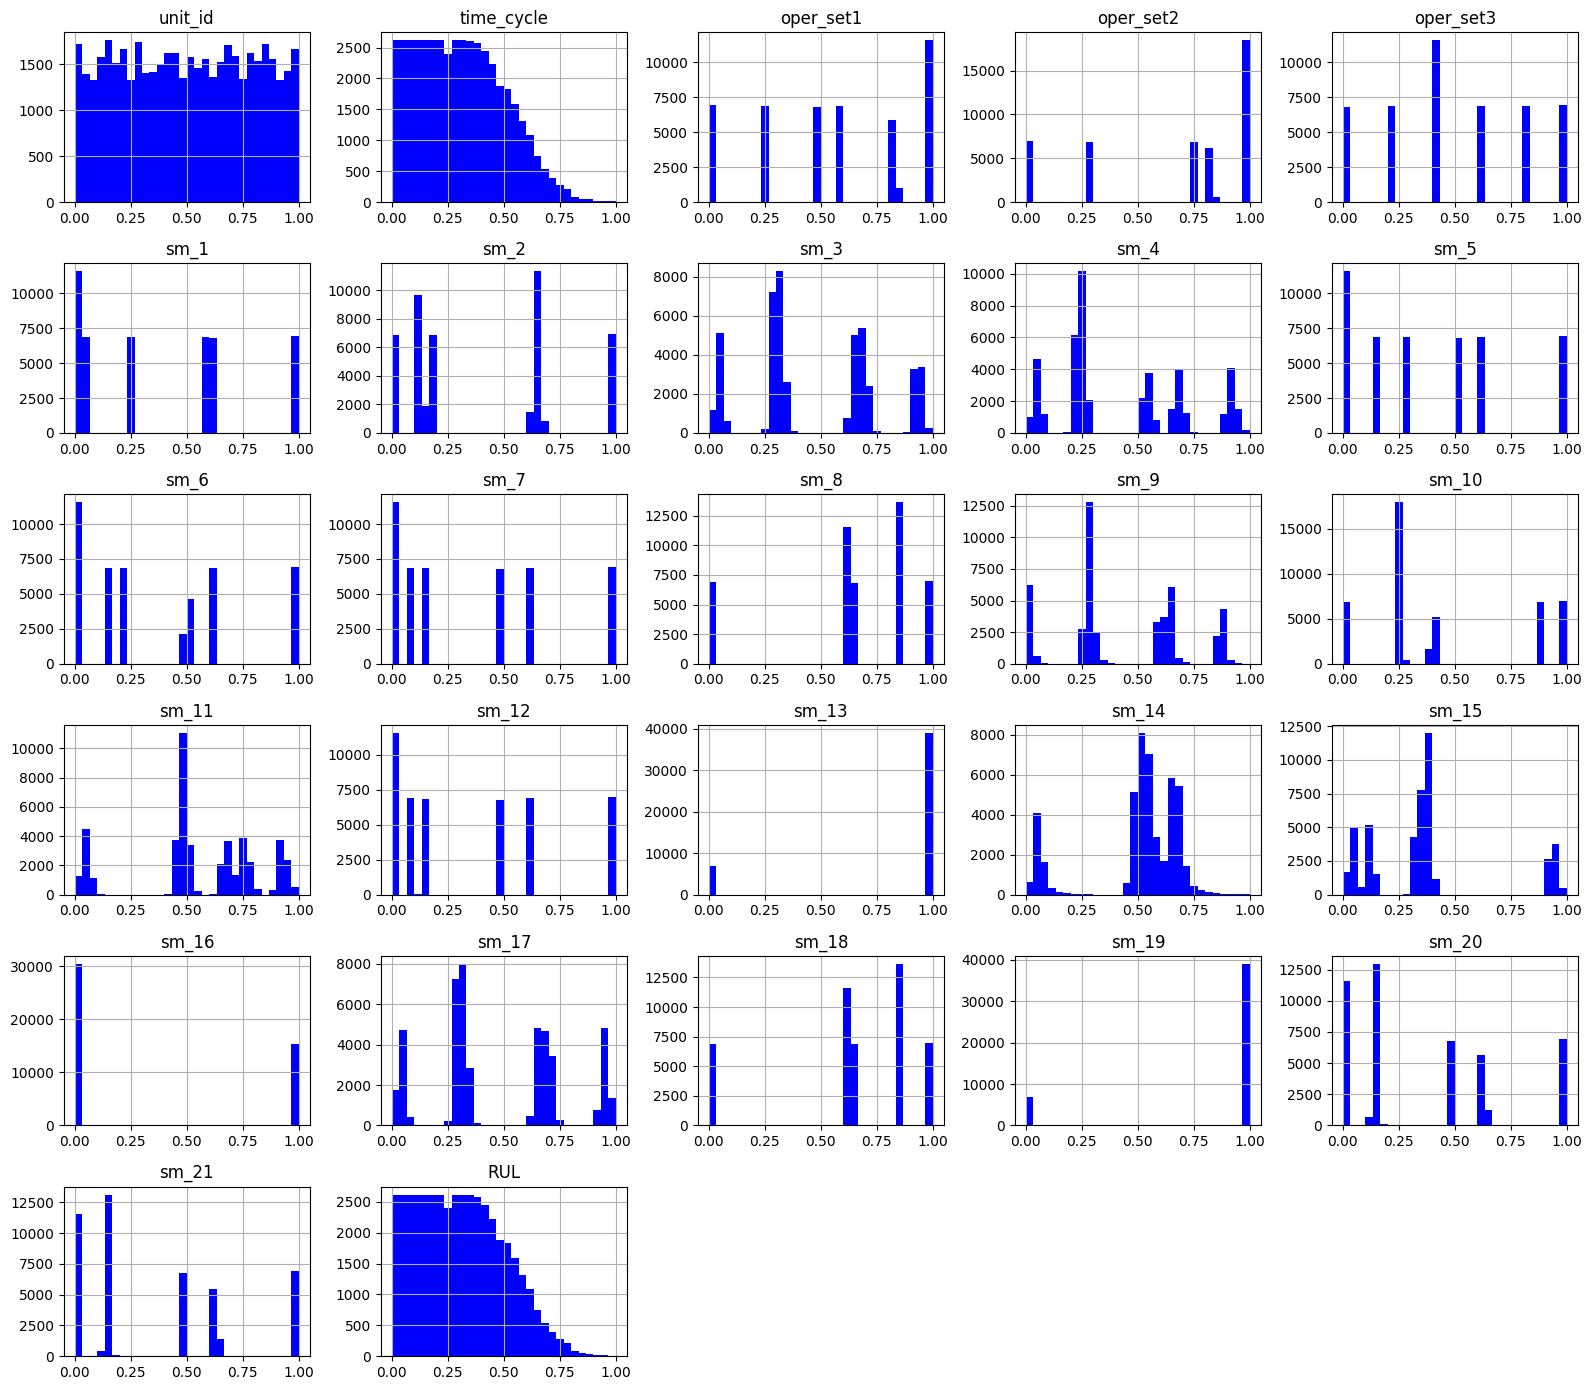

In [20]:
norm_train_df.hist(bins=30, figsize=(16,14), color='b')
plt.tight_layout()
plt.show()

# Filtro de Kalman

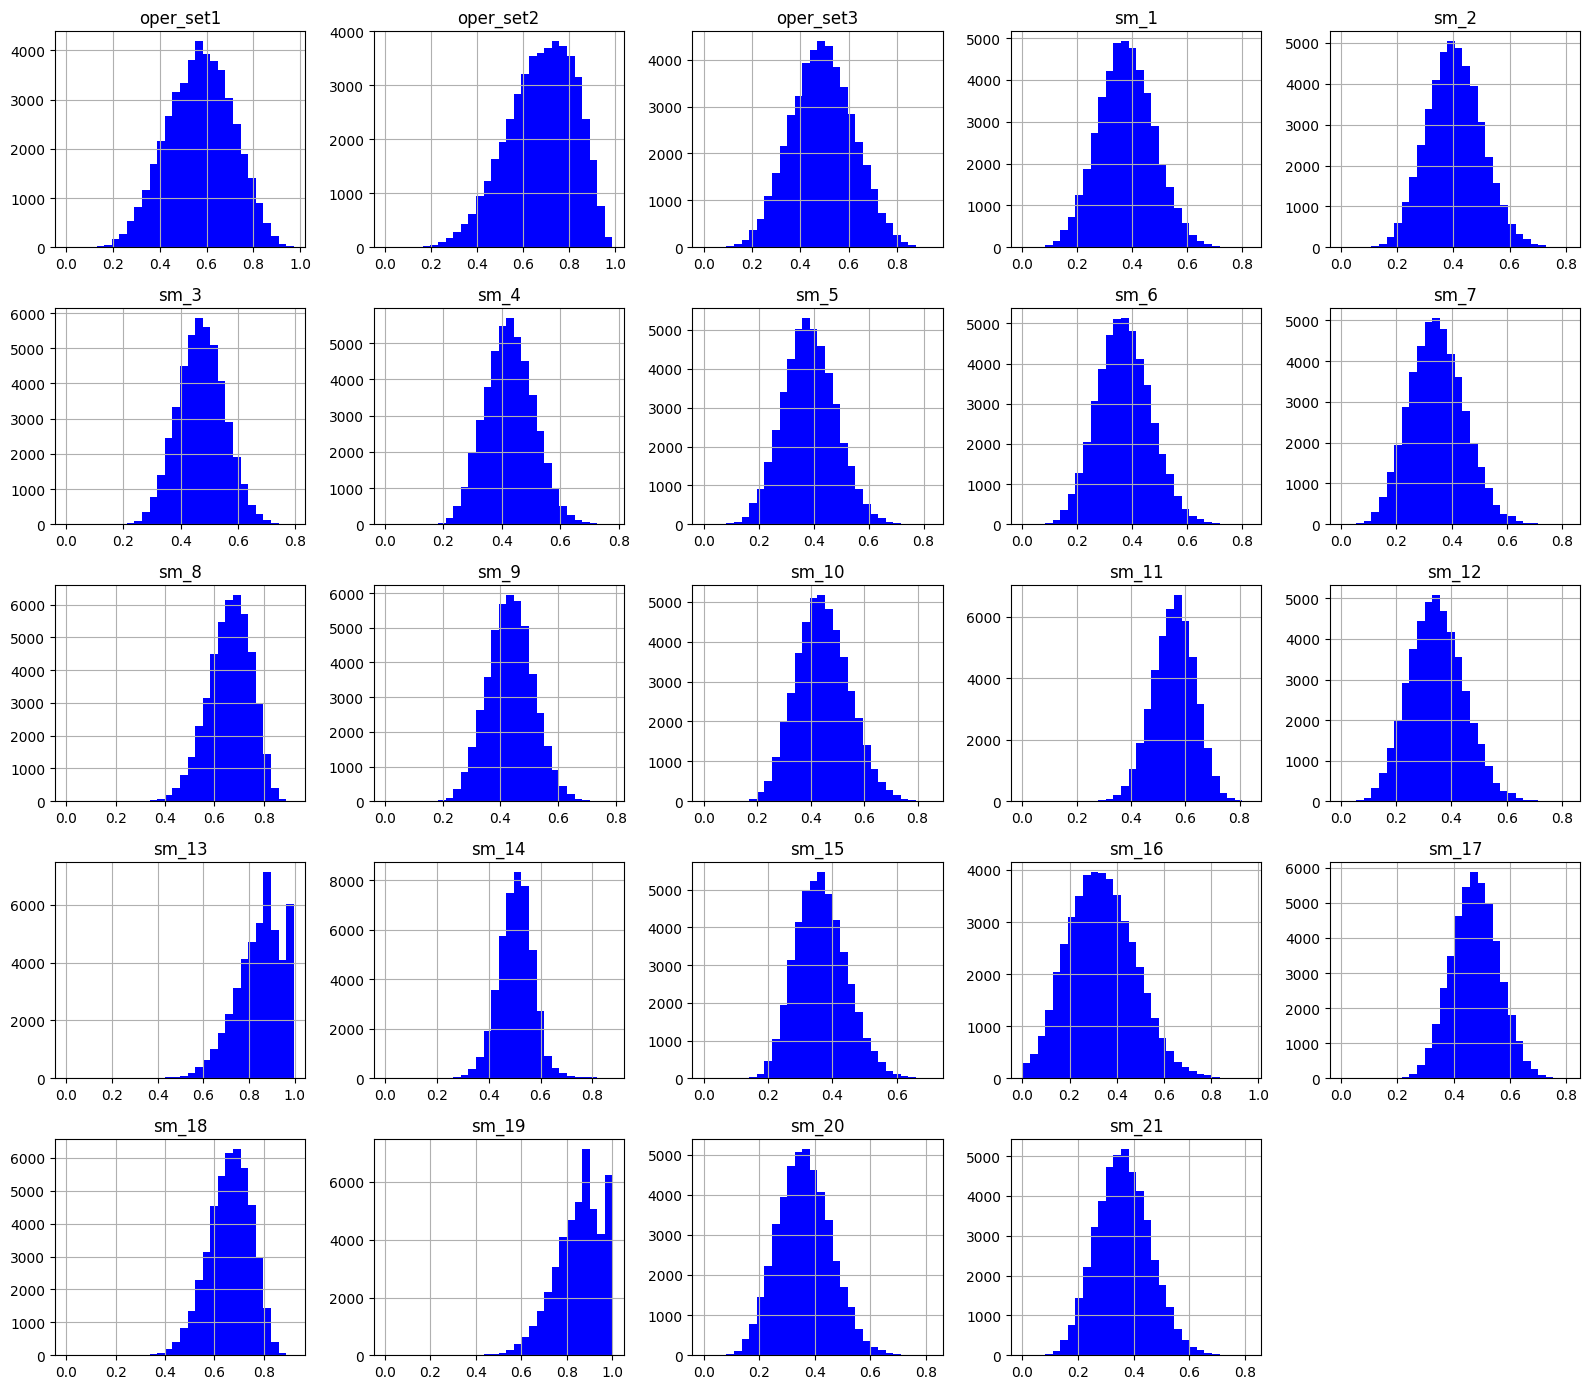

In [28]:
def kalman_filter(data, R, Q, P=1, x_init=0):

    n = len(data)
    x_hat = np.zeros(n)  
    P_est = np.zeros(n)  

    # Initial values
    x_hat[0] = x_init
    P_est[0] = P

    for k in range(1, n):
        # Predicción
        x_pred = x_hat[k-1] 
        P_pred = P_est[k-1] + Q  # Covarianza predicha
        
        # Actualizar ganancia
        K = P_pred / (P_pred + R)  # Kalman gain
        x_hat[k] = x_pred + K * (data[k] - x_pred) 
        P_est[k] = (1 - K) * P_pred  # Actualiza error de  covarianza
    
    return x_hat

# Se filtran solo los datos de los sensores y los operation settings
sensor_columns = norm_train_df.columns[2:26]

filtered_train_df = pd.DataFrame()

for sensor in sensor_columns:
    filtered_train_df[sensor] = kalman_filter(norm_train_df[sensor].values, 0.1, 0.01)
    
filtered_train_df.hist(bins=30, figsize=(16,14), color='b')
plt.tight_layout()
plt.show()

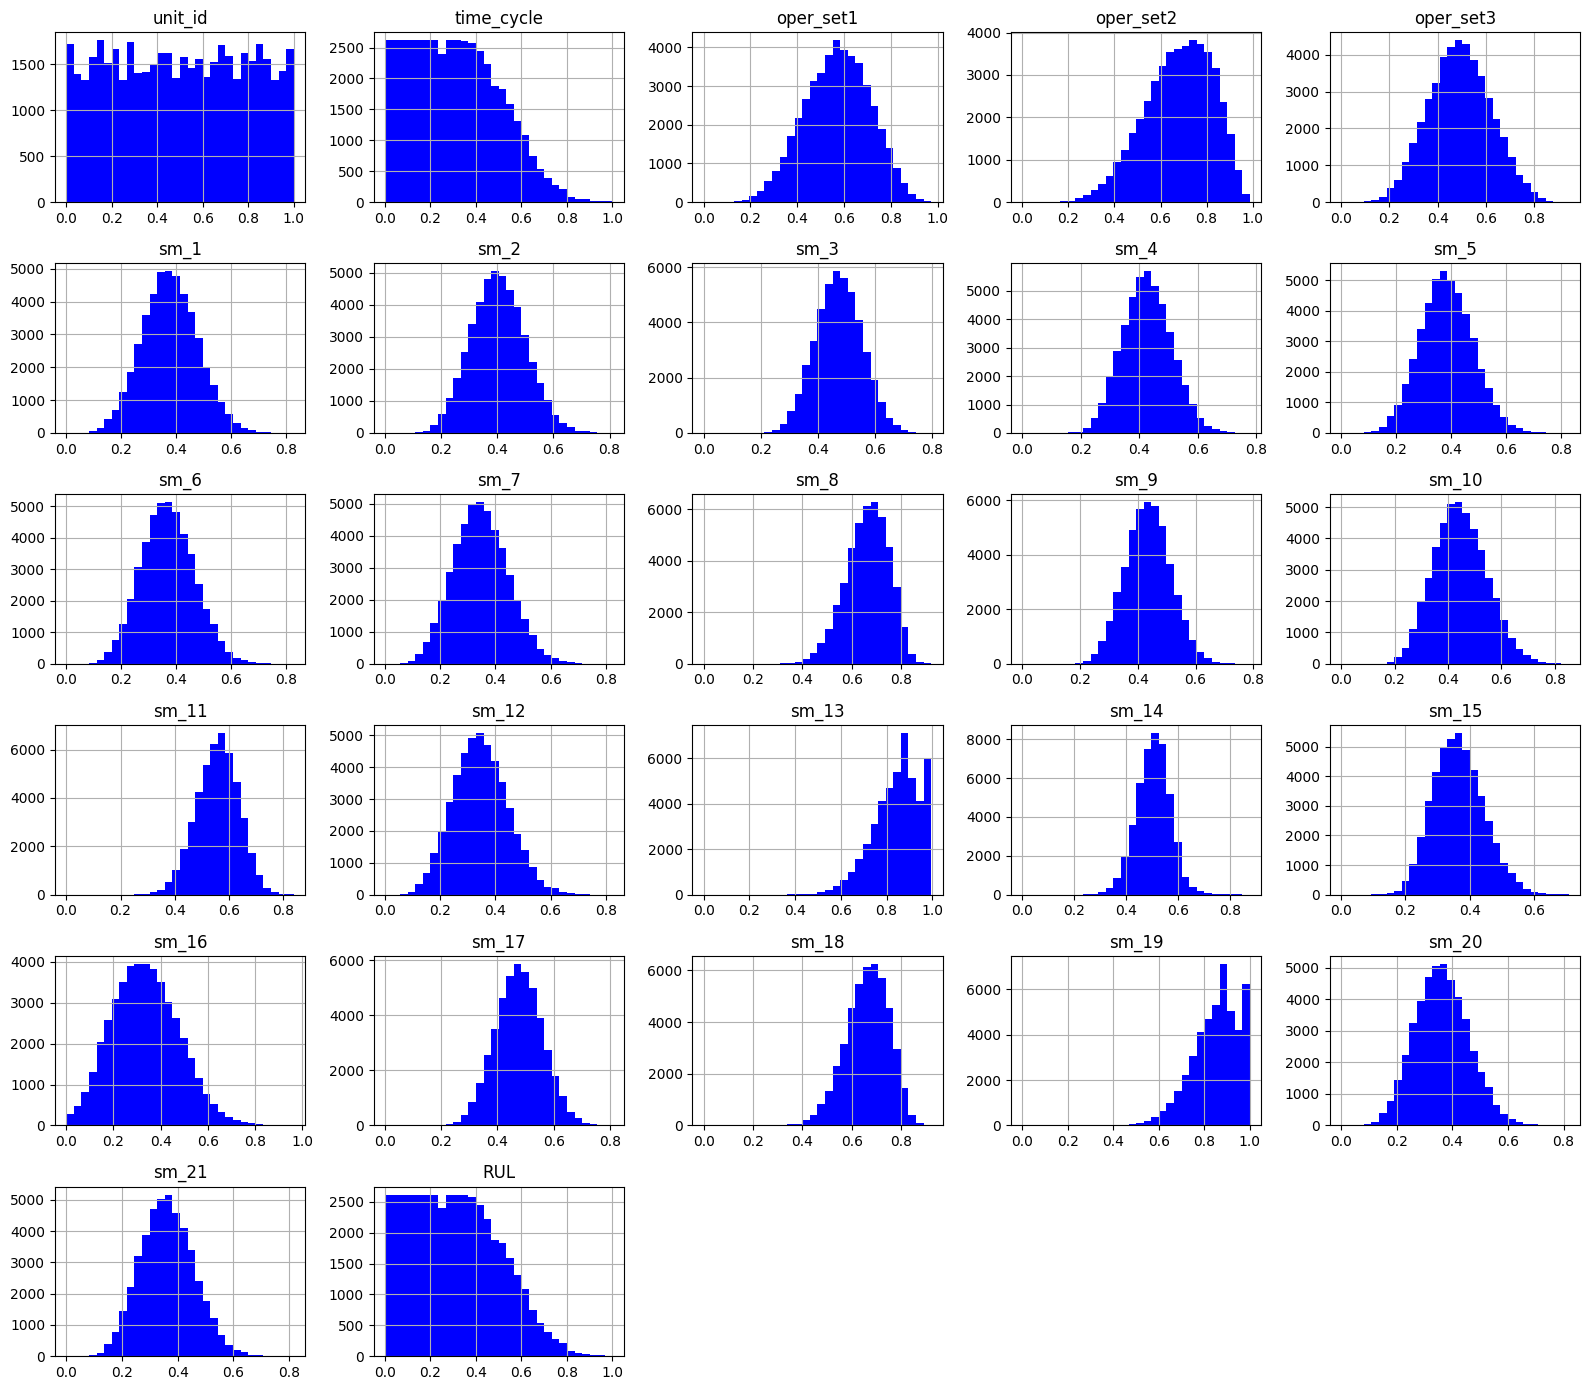

In [31]:
# Se mezclan los datos de ambos dataframes para crear uno con los datos normalizados y filtrados.
norm_train_df.iloc[:, 2:26] = filtered_train_df.iloc[:, 0:24]

# Se muestran los datos de todo el dataframe normalizado y filtrado.
norm_train_df.hist(bins=30, figsize=(16,14), color='b')
plt.tight_layout()
plt.show()

# Crear subset de validación

In [27]:
# Separar los datos por ID.
unit_ids = norm_train_df['unit_id'].unique()

# Se hacen dos grupos de datos, 80% test y 20% validación
train_engines, val_engines = train_test_split(unit_ids, test_size=0.2, random_state=42)

# Se acomodan los datos por ID
train_data = norm_train_df[norm_train_df['unit_id'].isin(train_engines)]
val_data = norm_train_df[norm_train_df['unit_id'].isin(val_engines)]

train_data

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,0.0,0.000000,0.238162,0.297031,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.623596
1,0.0,0.002809,0.000036,0.000356,1.0,0.909910,0.890671,0.835708,0.825281,0.909910,...,0.903418,0.604643,0.021582,0.909910,0.842864,0.909910,0.909910,0.899279,0.897999,0.620787
2,0.0,0.005618,0.833141,0.997743,0.6,0.482995,0.534459,0.582824,0.523788,0.526369,...,0.948085,0.552782,0.198509,0.452712,0.583316,0.779898,0.955177,0.526850,0.525301,0.617978
3,0.0,0.008427,0.476174,0.831948,0.0,0.537130,0.580224,0.611145,0.526915,0.519439,...,0.964838,0.523226,0.246293,0.282510,0.605419,0.811778,0.972029,0.512104,0.514167,0.615169
4,0.0,0.011236,0.999907,0.998219,0.4,0.363918,0.434233,0.509307,0.431065,0.351933,...,0.973645,0.531304,0.280700,0.191407,0.501837,0.752484,0.981049,0.355385,0.353455,0.612360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,1.0,0.359551,0.999967,0.997625,0.4,0.303526,0.306530,0.401493,0.390104,0.319545,...,0.719920,0.391125,0.482002,0.261453,0.404528,0.544688,0.725909,0.277022,0.276765,0.011236
45914,1.0,0.362360,0.999879,0.999406,0.4,0.221526,0.259531,0.380916,0.358472,0.233218,...,0.793010,0.419782,0.463149,0.190820,0.377711,0.567170,0.799956,0.203761,0.204277,0.008427
45915,1.0,0.365169,0.999807,0.997625,0.4,0.161680,0.224857,0.361259,0.340581,0.170213,...,0.846392,0.441131,0.451427,0.139269,0.363826,0.583579,0.853999,0.150013,0.150192,0.005618
45916,1.0,0.367978,0.833191,0.999881,0.6,0.134283,0.216016,0.362161,0.324474,0.163831,...,0.885524,0.444254,0.436846,0.101644,0.362224,0.601837,0.893442,0.150985,0.149056,0.002809


# Creación del modelo ESN